#### Step 1 导入相关包

In [7]:
import pandas as pd
import numpy as np
import pickle
import json

from tqdm import tqdm
from collections import defaultdict
import pickle
from itertools import combinations

import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns

# 设置全局字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20  # 设置全局字体大小

#### Step 2 加载数据

In [2]:
# 打开文件
with open('./data/per_year_academic_sim_industry.pickle', 'rb') as file:
    # 读取文件内容
    per_year_academic_sim_industry = pickle.load(file)

In [3]:
# 打开文件
with open('./data/per_year_industry_sim_academic.pickle', 'rb') as file:
    # 读取文件内容
    per_year_industry_sim_academic = pickle.load(file)

#### Step 3

In [4]:
sim_value_dict = defaultdict(dict)
for year in per_year_academic_sim_industry:
    sim_value_dict[year] = defaultdict(dict)
    
    value_dict = per_year_academic_sim_industry[year]
    for compare_year in value_dict:
        sim_value_dict[year][compare_year] = defaultdict(list)
        sub_sim_dict = value_dict[compare_year]['academic']
        for (id,sim_institution),value in sub_sim_dict.items():
            if sim_institution == 'industry':
                sim_value_dict[year][compare_year][sim_institution].append(value)

In [5]:
sim_value_dict[2022].keys()

dict_keys([2020, 2021, 2022])

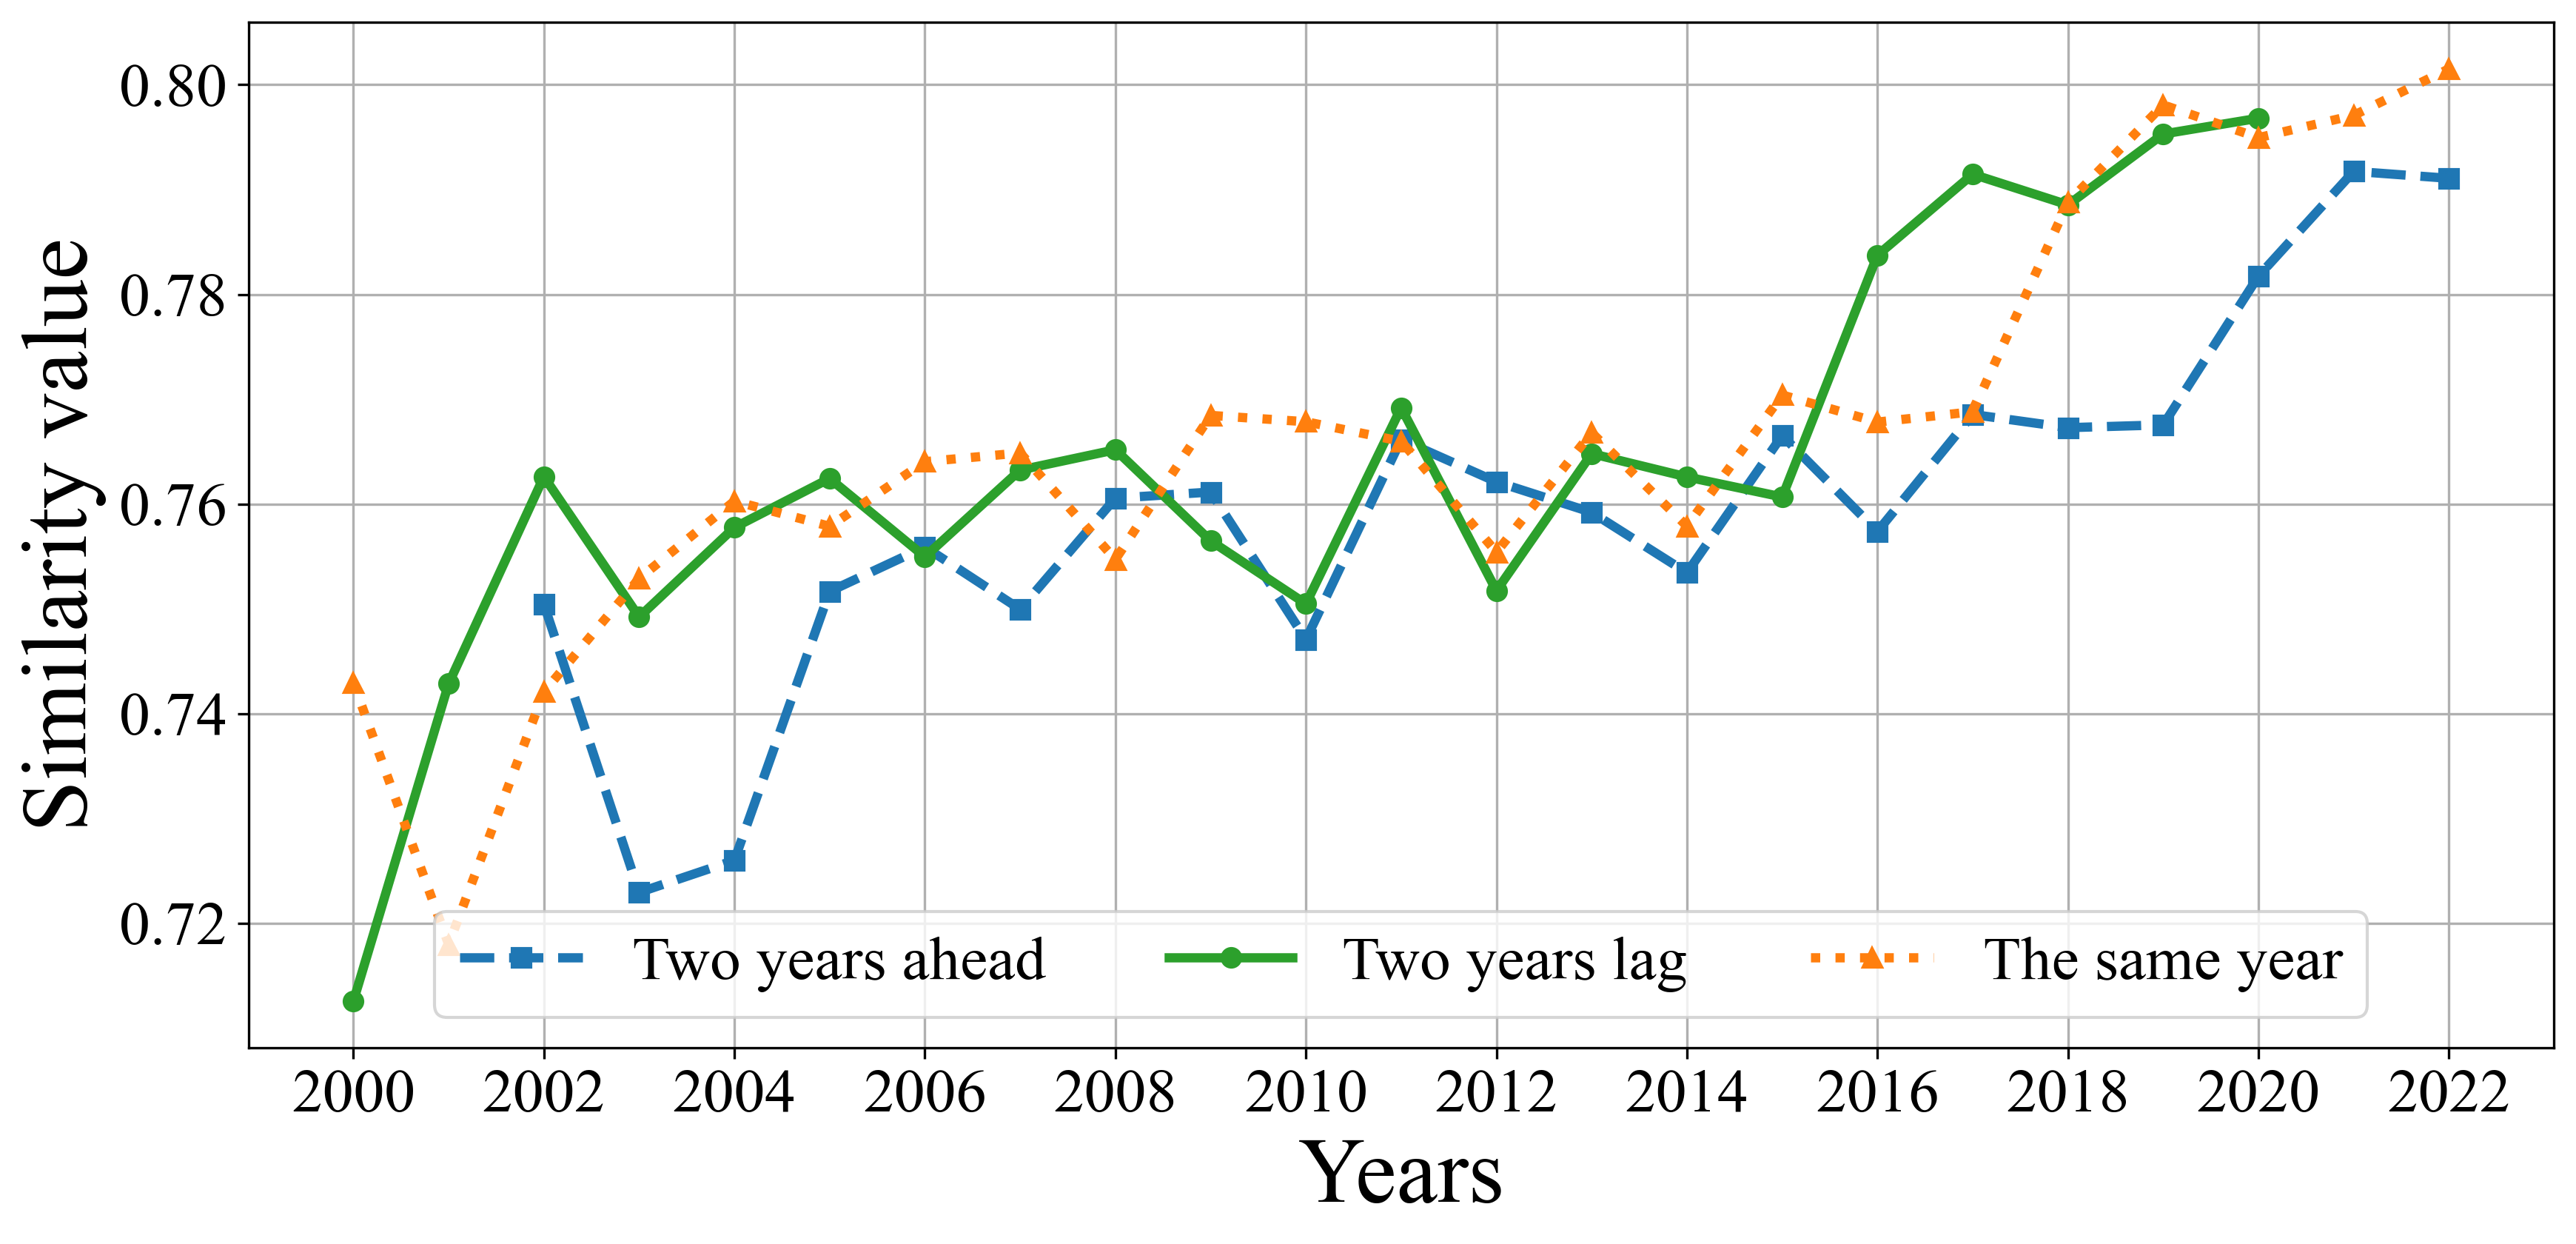

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Example function to get numerical features


def get_numerical_features(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    return mean, std_dev


# Example data (replace with your actual data and calculations)
before_means = []
before_std = []
after_means = []
after_std = []
this_means = []
this_std = []

years_before = range(2002, 2023)
years_after = range(2000, 2021)
years_this = range(2000, 2023)

for year in range(2000, 2023):
    if year >= 2002:
        before = year - 2
        lists_before = sim_value_dict[year][before]['industry']
        before_mean, before_std_dev = get_numerical_features(lists_before)
        before_means.append(before_mean)
        before_std.append(before_std_dev)

    if year <= 2020:
        after = year + 2
        lists_after = sim_value_dict[year][after]['industry']
        after_mean, after_std_dev = get_numerical_features(lists_after)
        after_means.append(after_mean)
        after_std.append(after_std_dev)

    lists_this = sim_value_dict[year][year]['industry']
    this_mean, this_std_dev = get_numerical_features(lists_this)
    this_means.append(this_mean)
    this_std.append(this_std_dev)

# Plotting
plt.figure(figsize=(12,6), dpi=300)

# Plot original data
plt.plot(years_before, before_means, '--s', color='tab:blue', label='Two years ahead', linewidth=3)
plt.plot(years_after, after_means, '-o', color='tab:green', label='Two years lag', linewidth=3)
plt.plot(years_this, this_means, ':^', color='tab:orange', label='The same year', linewidth=3)


# 设置 x 轴的刻度间隔为每两年
plt.xticks(range(2000, 2023, 2))
plt.xlabel('Years', fontsize=30)
plt.ylabel('Similarity value', fontsize=30)
# plt.title('Mean Values with 99% Confidence Intervals')

# Legend settings to center and adjust position
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 0), ncol=3, fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Step 4

In [10]:
sim_value_industry_dict = defaultdict(dict)
for year in per_year_industry_sim_academic:
    sim_value_industry_dict[year] = defaultdict(dict)
    
    value_dict = per_year_industry_sim_academic[year]
    for compare_year in value_dict:
        sim_value_industry_dict[year][compare_year] = defaultdict(list)
        sub_sim_dict = value_dict[compare_year]['industry']
        for (id,sim_institution),value in sub_sim_dict.items():
            if sim_institution == 'academic':
                sim_value_industry_dict[year][compare_year][sim_institution].append(value)

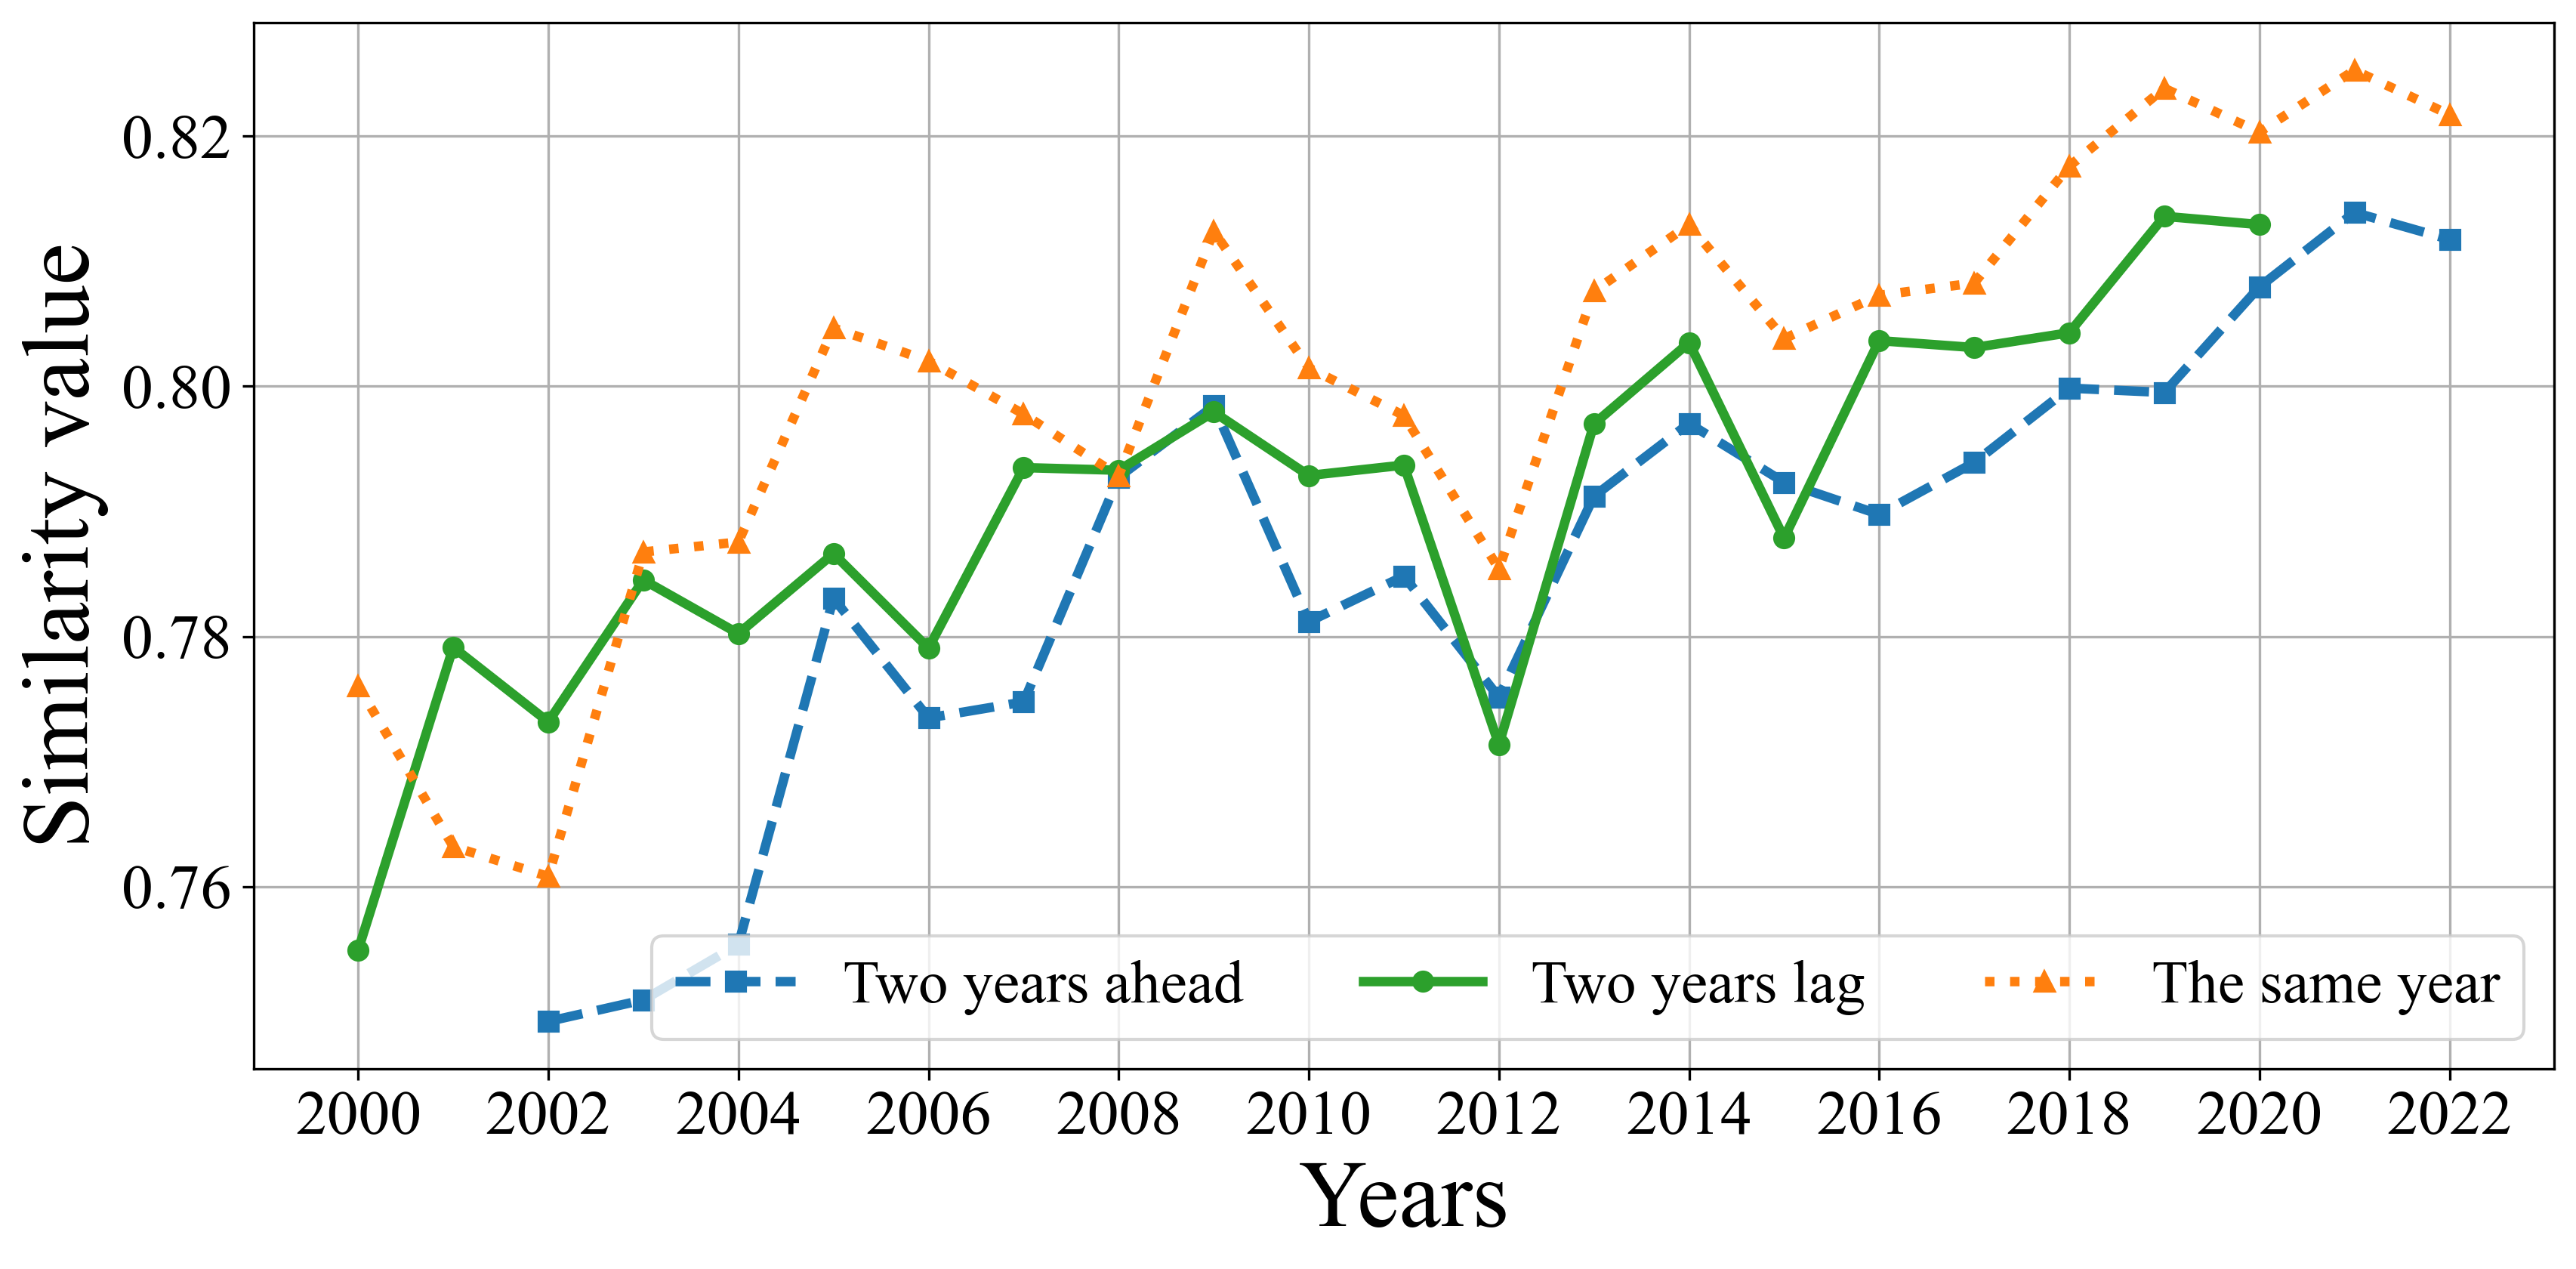

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Example function to get numerical features
def get_numerical_features(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    return mean, std_dev

# Example data (replace with your actual data and calculations)
before_means = []
before_std = []
after_means = []
after_std = []
this_means = []
this_std = []

years_before = range(2002, 2023)
years_after = range(2000, 2021)
years_this = range(2000, 2023)

for year in range(2000, 2023):
    if year >= 2002:
        before = year - 2
        lists_before = sim_value_industry_dict[year][before]['academic']
        before_mean, before_std_dev = get_numerical_features(lists_before)
        before_means.append(before_mean)
        before_std.append(before_std_dev)

    if year <= 2020:
        after = year + 2
        lists_after = sim_value_industry_dict[year][after]['academic']
        after_mean, after_std_dev = get_numerical_features(lists_after)
        after_means.append(after_mean)
        after_std.append(after_std_dev)

    lists_this = sim_value_industry_dict[year][year]['academic']
    this_mean, this_std_dev = get_numerical_features(lists_this)
    this_means.append(this_mean)
    this_std.append(this_std_dev)

# Plotting
plt.figure(figsize=(12,6), dpi=300)

# Plot original data
plt.plot(years_before, before_means, '--s', color='tab:blue', label='Two years ahead',linewidth=3)
plt.plot(years_after, after_means, '-o', color='tab:green', label='Two years lag',linewidth=3)
plt.plot(years_this, this_means, ':^', color='tab:orange', label='The same year',linewidth=3)


# 设置 x 轴的刻度间隔为每两年
plt.xticks(range(2000, 2023, 2))
plt.xlabel('Years',fontsize=30)
plt.ylabel('Similarity value',fontsize=30)
plt.legend(loc='lower center', bbox_to_anchor=(0.58, 0), ncol=3,fontsize=19)

plt.grid(True)
plt.tight_layout()
plt.show()
